## Load breast cancer dataset and separate features (X) from target labels (y)
Loading the data
- Each row = a patient
- Each column = a measured property of cell nuclei
- Label = cancer (malignant vs benign)

Turned labels into numbers (ML needs numbers)
Split into:
- X = features (the 30 measurements)
- y = target (cancer or not)

In [9]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cols = ["id","label"] + [f"f{i}" for i in range(30)]
df = pd.read_csv(url, header=None, names=cols)

df["label"] = df["label"].map({"M":1, "B":0})

X = df.drop(["id","label"], axis=1)
y = df["label"]

df.head()

,id,label,f0,f1,f2,f3,f4,f5,f6,f7,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Principal Component Analysis (PCA)
Standardize features, then project onto the first two principal components. The `explained_variance_ratio_` shows how much of the original variance is retained.

By keeping top 2 PCs, we reduce from 30 → 2 dimensions

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features so each variable contributes equally to PCA
X_scaled = StandardScaler().fit_transform(X)

# Project high-dimensional gene data onto first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check how much variance the first two components capture
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

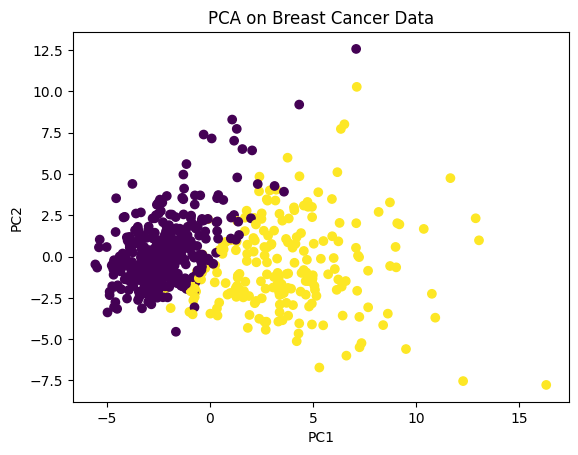

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Breast Cancer Data")
plt.show()

Together = 63% of total variance → the 2D plot represents 63% of the original structure
PCA is meaningful, not just arbitrary.

## Conclusion

PCA reduced 30 gene-related features to two principal components.  
The resulting plot shows partial separation between malignant and benign samples, indicating that the dataset contains meaningful low-dimensional structure. This demonstrates that dimensionality reduction can reveal patterns in high-dimensional biological data.